<a href="https://colab.research.google.com/github/lupiel/kaggle-titanic-ml/blob/main/ml-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

In [149]:
from pathlib import Path
import pandas as pd
import numpy as np

# To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
np.random.seed(888)

data_root = "https://github.com/lupiel/kaggle-titanic-ml/raw/main/"

train_data = pd.read_csv(data_root + "data/train.csv")
test_data = pd.read_csv(data_root + "data/test.csv")
dummy_prediction = pd.read_csv(data_root + "data/gender_submission.csv")

train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")
dummy_prediction = dummy_prediction.set_index("PassengerId")


## Explore the data

In [68]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [70]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


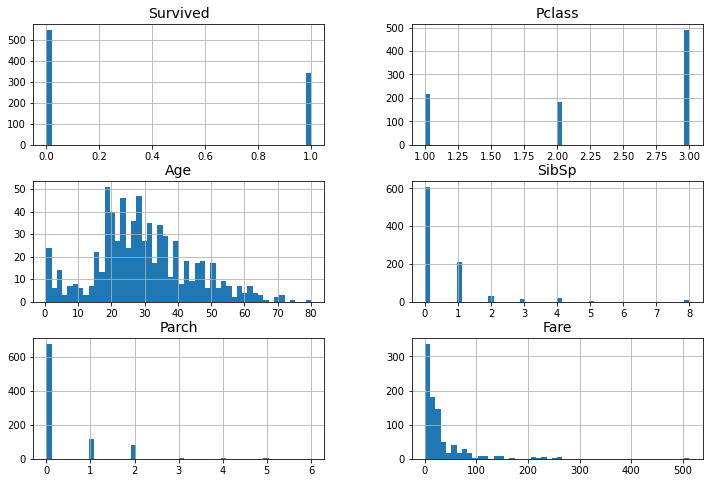

In [71]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [72]:
# target
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [54]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [55]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [56]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

# Can spot a direct correlation of Survived with Pclass and Fare

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

## ML

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

In [76]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# pipeline for categorical attributes
cat_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [79]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

# preprocessing pipeline
preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [95]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train[:2].round(2)

array([[-0.57,  0.43, -0.47, -0.5 ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ],
       [ 0.66,  0.43, -0.47,  0.79,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ]])

In [87]:
y_train = train_data["Survived"]

In [88]:
from sklearn.ensemble import RandomForestClassifier

# training the model
rforest_clf = RandomForestClassifier(random_state=888)
rforest_clf.fit(X_train, y_train)

# making predictions
X_test = preprocess_pipeline.transform(test_data)
y_pred = rforest_clf.predict(X_test)

In [89]:
from sklearn.model_selection import cross_val_score

# checking how good our model is
forest_scores = cross_val_score(rforest_clf, X_train, y_train, cv=10)
forest_scores

array([0.74444444, 0.79775281, 0.75280899, 0.83146067, 0.88764045,
       0.83146067, 0.80898876, 0.76404494, 0.83146067, 0.84269663])

In [90]:
y_pred[:15]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [91]:
answers_df = pd.DataFrame(data={"Survived": y_pred}, index=test_data.index)
answers_df.to_csv("answers_rforest_clf.csv")

In [93]:
answers_df.head(2)

,Survived
PassengerId,
892,0
893,0


## Evaluating the model